##  Step 1: Load Dataset 

In [1]:
from sklearn import datasets 
iris = datasets.load_iris() 
X = iris.data 
y = iris.target 
print(X[:5]) 
print(y[:5]) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


## Step 2: Visualize the Data

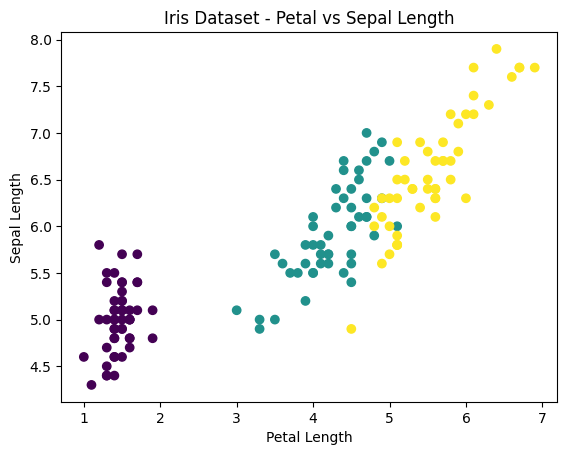

In [2]:
import matplotlib.pyplot as plt 
plt.scatter(X[:, 2], X[:, 0], c=y) 
plt.xlabel("Petal Length") 
plt.ylabel("Sepal Length") 
plt.title("Iris Dataset - Petal vs Sepal Length") 
plt.show()

##  Step 3: Train-Test Split 

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

## Step 4: Train Decision Tree Classifier 

In [4]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(random_state=1) 
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

## Step 5: Visualize the Tree 

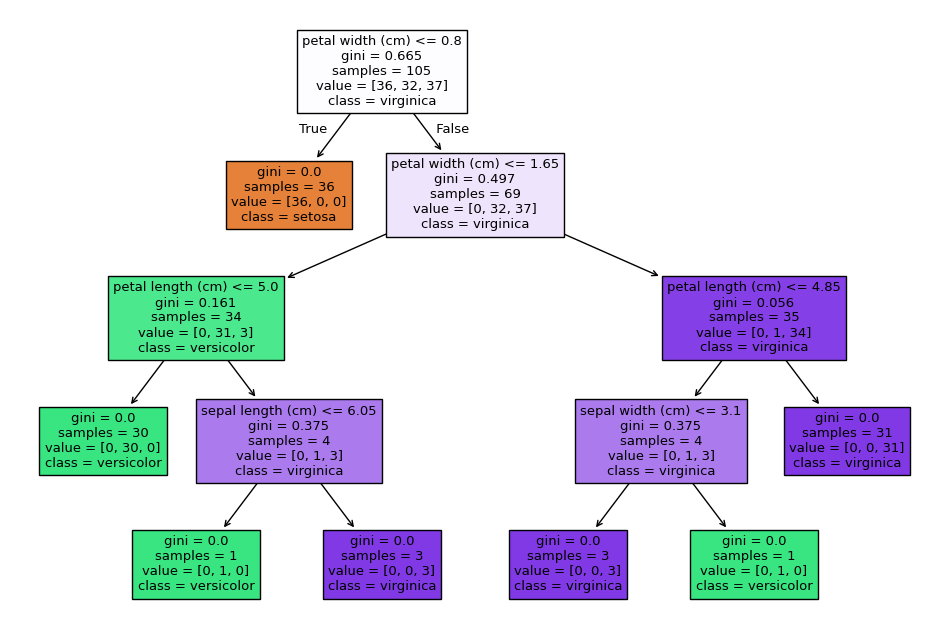

In [5]:
from sklearn import tree 
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,8)) 
tree.plot_tree(classifier, filled=True, 
feature_names=iris.feature_names, 
class_names=iris.target_names) 
plt.show() 

##  Step 6: Make Predictions

In [6]:
y_pred = classifier.predict(X_test) 
print("Predictions:", y_pred) 
print("Actual:", y_test) 

Predictions: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
Actual: [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


##  Step 7: Evaluate the Model

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Confusion Matrix:\n", 
confusion_matrix(y_test, y_pred)) 
print("Classification Report:\n", 
classification_report(y_test, y_pred, 
target_names=iris.target_names)) 

Accuracy: 0.9555555555555556
Confusion Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Step 8: Compare Gini vs Entropy 

In [8]:
# Gini 
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=1) 
clf_gini.fit(X_train, y_train) 

# Entropy 
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1) 
clf_entropy.fit(X_train, y_train) 

# Accuracy Comparison 
acc_gini = accuracy_score(y_test, 
clf_gini.predict(X_test)) 
acc_entropy = accuracy_score(y_test, 
clf_entropy.predict(X_test)) 
print("Accuracy with Gini:", acc_gini) 
print("Accuracy with Entropy:", acc_entropy) 

Accuracy with Gini: 0.9555555555555556
Accuracy with Entropy: 0.9555555555555556


# Exercise

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.shape

(569, 33)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
x = data.drop('diagnosis', axis=1)

In [9]:
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [10]:
y = data['diagnosis']

In [11]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

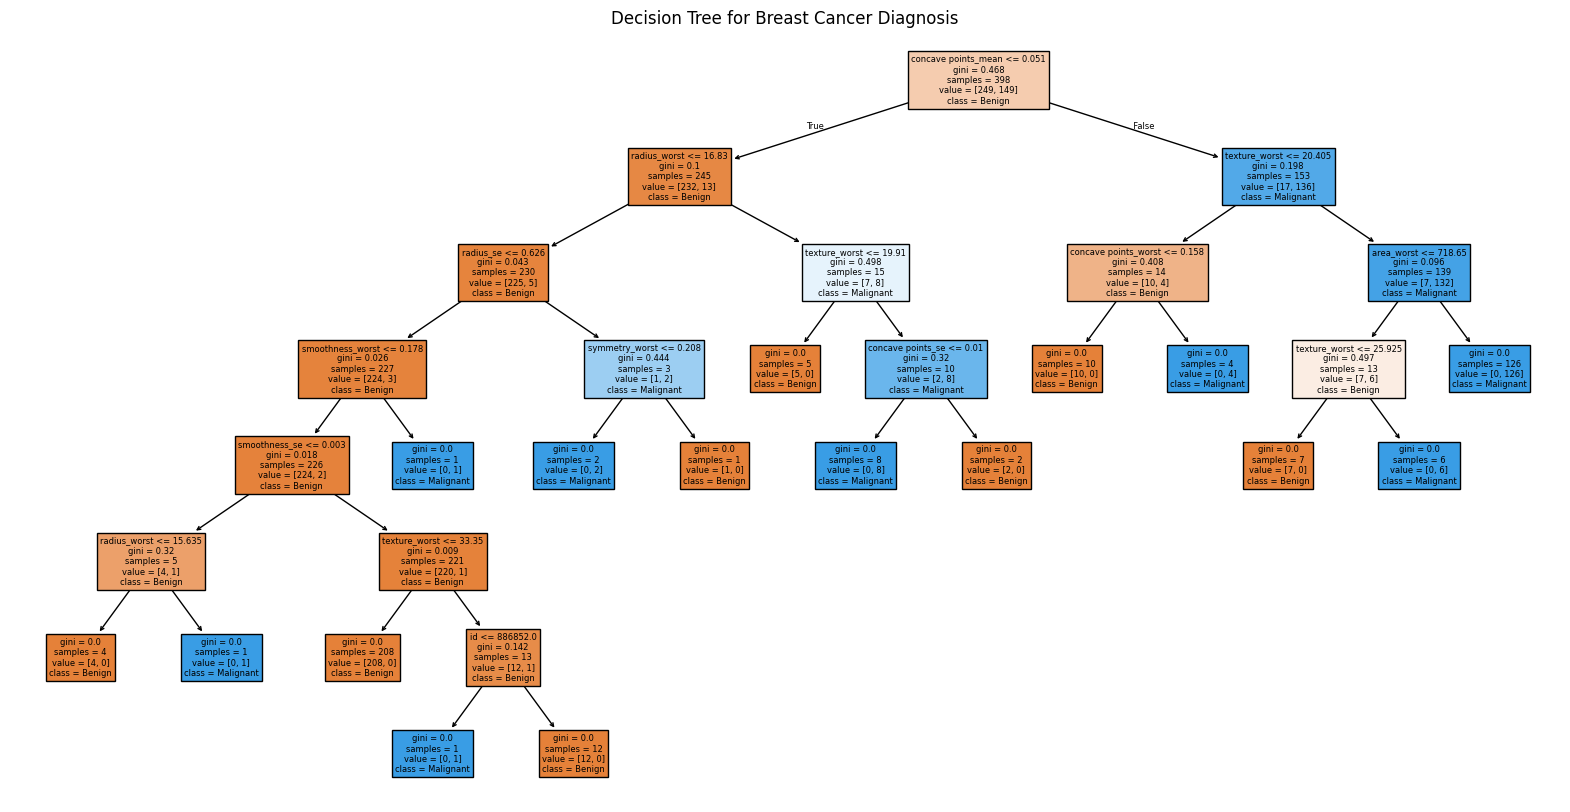

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True,
               feature_names=x.columns,
               class_names=["Benign", "Malignant"])
plt.title("Decision Tree for Breast Cancer Diagnosis")
plt.show()

In [29]:
y_pred = model.predict(X_test)

print("Predictions:", y_pred[:10])
print("Actual:", y_test.values[:10])

Predictions: ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B']
Actual: ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B']


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

Accuracy: 0.9415204678362573
Confusion Matrix:
 [[101   7]
 [  3  60]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.97      0.94      0.95       108
   Malignant       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [31]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(x_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(x_train, y_train)

acc_gini = accuracy_score(y_test, clf_gini.predict(x_test))
acc_entropy = accuracy_score(y_test, clf_entropy.predict(x_test))

print("Accuracy with Gini:", acc_gini)
print("Accuracy with Entropy:", acc_entropy)

Accuracy with Gini: 0.9415204678362573
Accuracy with Entropy: 0.9532163742690059


In [32]:
depths = [2, 4, 6, 8, 10, None]
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(x_train, y_train)
    acc = accuracy_score(y_test, clf.predict(x_test))
    print(f"Max Depth = {d} => Accuracy = {acc:.4f}")

Max Depth = 2 => Accuracy = 0.9298
Max Depth = 4 => Accuracy = 0.9591
Max Depth = 6 => Accuracy = 0.9474
Max Depth = 8 => Accuracy = 0.9415
Max Depth = 10 => Accuracy = 0.9415
Max Depth = None => Accuracy = 0.9415
